<a href="https://colab.research.google.com/github/EnricoHuber/Australian-Rain-Classification/blob/main/Rain_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset is taken from [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import numpy as np
import os
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

# Get the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def get_filepath(file, folder):
  dirpath = os.sep + 'content' + os.sep + 'drive' + os.sep + 'MyDrive' + os.sep + folder
  filepath = os.path.join(dirpath, file)
  return filepath

In [ ]:
directory = 'DATASETS'
filename = 'weatherAUS.csv'
file_path = get_filepath(filename, directory)

In [ ]:
file_path

'/content/drive/MyDrive/DATASETS/weatherAUS.csv'

In [ ]:
dataset = pd.read_csv(file_path)

# Explore the Data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
print(dataset.head(), dataset.tail(), sep='\n')

         Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]
              Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[5 rows x 23 columns]


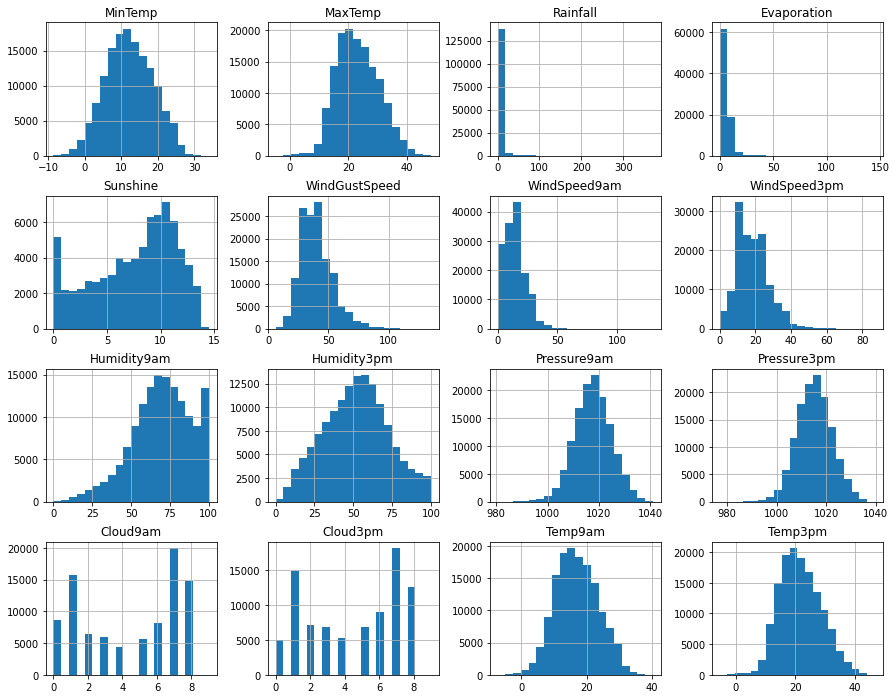

In [ ]:
dataset.hist(bins=20, figsize=(15, 12))
plt.show()

In [ ]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116368 entries, 111548 to 121958
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           116368 non-null  object 
 1   Location       116368 non-null  object 
 2   MinTemp        115190 non-null  float64
 3   MaxTemp        115370 non-null  float64
 4   Rainfall       113764 non-null  float64
 5   Evaporation    66039 non-null   float64
 6   Sunshine       60426 non-null   float64
 7   WindGustDir    108118 non-null  object 
 8   WindGustSpeed  108166 non-null  float64
 9   WindDir9am     107939 non-null  object 
 10  WindDir3pm     112971 non-null  object 
 11  WindSpeed9am   114960 non-null  float64
 12  WindSpeed3pm   113911 non-null  float64
 13  Humidity9am    114251 non-null  float64
 14  Humidity3pm    112752 non-null  float64
 15  Pressure9am    104307 non-null  float64
 16  Pressure3pm    104326 non-null  float64
 17  Cloud9am       71611 non

In [ ]:
corr_matrix = dataset.corr()

In [ ]:
corr_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [ ]:
#corr_matrix['RainTomorrow'].sort_values(ascending=False)

In [ ]:
train_to_proc = train_set.copy()

Dealing with NAN values

In [ ]:
nan_columns = [(column, train_to_proc[column].isnull().sum(), round((train_to_proc[column].isnull().sum())/(len(train_to_proc[column])), 2)*100) for column in train_to_proc if train_to_proc[column].isnull().sum()]
nan_columns

[('MinTemp', 1178, 1.0),
 ('MaxTemp', 998, 1.0),
 ('Rainfall', 2604, 2.0),
 ('Evaporation', 50329, 43.0),
 ('Sunshine', 55942, 48.0),
 ('WindGustDir', 8250, 7.000000000000001),
 ('WindGustSpeed', 8202, 7.000000000000001),
 ('WindDir9am', 8429, 7.000000000000001),
 ('WindDir3pm', 3397, 3.0),
 ('WindSpeed9am', 1408, 1.0),
 ('WindSpeed3pm', 2457, 2.0),
 ('Humidity9am', 2117, 2.0),
 ('Humidity3pm', 3616, 3.0),
 ('Pressure9am', 12061, 10.0),
 ('Pressure3pm', 12042, 10.0),
 ('Cloud9am', 44757, 38.0),
 ('Cloud3pm', 47548, 41.0),
 ('Temp9am', 1405, 1.0),
 ('Temp3pm', 2897, 2.0),
 ('RainToday', 2604, 2.0),
 ('RainTomorrow', 2607, 2.0)]

In [ ]:
imputer = SimpleImputer(strategy='median')
def handle_NAN(dataset):
  """
  Deal with NAN values 
  """
  dataset = dataset.drop('Cloud9am', axis=1)
  dataset = dataset.drop('Cloud3pm', axis=1)
  dataset = dataset.drop('Sunshine', axis=1)
  dataset = dataset.drop('Evaporation', axis=1)
  dataset = dataset.dropna()
  #dataset_imp = imputer.fit_transform(dataset)

  return dataset

In [ ]:
# Run this cell to remove all NAN values
train_to_proc = handle_NAN(train_to_proc)
train_to_proc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90286 entries, 142528 to 121958
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           90286 non-null  object 
 1   Location       90286 non-null  object 
 2   MinTemp        90286 non-null  float64
 3   MaxTemp        90286 non-null  float64
 4   Rainfall       90286 non-null  float64
 5   WindGustDir    90286 non-null  object 
 6   WindGustSpeed  90286 non-null  float64
 7   WindDir9am     90286 non-null  object 
 8   WindDir3pm     90286 non-null  object 
 9   WindSpeed9am   90286 non-null  float64
 10  WindSpeed3pm   90286 non-null  float64
 11  Humidity9am    90286 non-null  float64
 12  Humidity3pm    90286 non-null  float64
 13  Pressure9am    90286 non-null  float64
 14  Pressure3pm    90286 non-null  float64
 15  Temp9am        90286 non-null  float64
 16  Temp3pm        90286 non-null  float64
 17  RainToday      90286 non-null  object 
 18  

In [ ]:
#imputer = SimpleImputer(strategy='constant', fill_value=0, verbose=2)
#imputer.fit(train_to_proc)
#train_to_proc_imputed = imputer.transform(train_to_proc)
#train_to_proc_imputed = pd.DataFrame(train_to_proc_imputed)
#train_to_proc_imputed.info()

In [ ]:
train_labels = train_to_proc.pop('RainTomorrow')

In [ ]:
cat_columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_to_proc_cat = train_to_proc[cat_columns]
train_to_proc_num = train_to_proc.drop(cat_columns, axis=1)

In [ ]:
train_to_proc_cat.head(), train_to_proc_num.head()

(              Date          Location  ... WindDir3pm RainToday
 142528  2013-10-11         Katherine  ...         NW        No
 65304   2012-02-18  MelbourneAirport  ...          S        No
 40651   2012-02-18       Williamtown  ...        SSE        No
 97487   2011-10-11          Adelaide  ...        SSW        No
 103132  2010-08-03         Nuriootpa  ...          W        No
 
 [5 rows x 6 columns],
         MinTemp  MaxTemp  Rainfall  ...  Pressure3pm  Temp9am  Temp3pm
 142528     24.6     39.5       0.0  ...       1006.6     30.1     39.2
 65304      14.7     26.6       0.2  ...       1015.4     17.3     24.5
 40651      18.3     26.6       0.0  ...       1016.5     23.0     25.4
 97487      11.4     19.3       0.6  ...       1017.1     14.4     18.3
 103132      4.9     10.3       0.0  ...       1026.0      7.8      9.6
 
 [5 rows x 12 columns])

In [ ]:
full_pipeline = ColumnTransformer([
                             ('std_scaler', StandardScaler(), list(train_to_proc_num)),
                             ('cat_encod_train', OneHotEncoder(), cat_columns),
])

train_to_proc_prepared = full_pipeline.fit_transform(train_to_proc)

In [ ]:
train_to_proc_prepared.toarray().shape

(90286, 3483)

In [ ]:
cat_encoder_labels = LabelEncoder()
train_labels_1hot = cat_encoder_labels.fit_transform(train_labels.values.reshape(-1))

In [ ]:
train_labels_1hot, train_labels_1hot.shape

(array([0, 0, 0, ..., 0, 0, 0]), (90286,))

In [ ]:
train_labels_1hot.sum(), (train_labels_1hot==0).sum()

(19993, 70293)

In [ ]:
scores = {}
runtime = {}
models = []

In [ ]:
def evaluate_model(model):
  t0 = time.time()
  scores[model] = np.mean(cross_val_score(model, train_to_proc_prepared, train_labels_1hot, verbose=1, n_jobs=-1, scoring='f1'))
  t1 = time.time() - t0
  runtime[model] = t1

In [ ]:
lr = LogisticRegression(solver='liblinear')
evaluate_model(lr)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


In [ ]:
svm = SVC()
evaluate_model(svm)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.3min finished


In [ ]:
print(scores, runtime, models, sep='\n')

{SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False): 0.6409344343352895, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False): 0.6327079059955968}
{SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False): 1397.5620090961456, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(units=20, input_shape=(3483,), activation='relu'),
                          keras.layers.Dense(units=40, activation='relu'),
                          keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                69680     
_________________________________________________________________
dense_4 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 70,561
Trainable params: 70,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adadelta(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(x=train_to_proc_prepared.toarray(), y=train_labels_1hot, batch_size=20, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
3612/3612 - 8s - loss: 0.6785 - accuracy: 0.7322 - val_loss: 0.6670 - val_accuracy: 0.7779
Epoch 2/100
3612/3612 - 7s - loss: 0.6543 - accuracy: 0.7785 - val_loss: 0.6413 - val_accuracy: 0.7792
Epoch 3/100
3612/3612 - 7s - loss: 0.6276 - accuracy: 0.7785 - val_loss: 0.6135 - val_accuracy: 0.7791
Epoch 4/100
3612/3612 - 7s - loss: 0.5992 - accuracy: 0.7785 - val_loss: 0.5847 - val_accuracy: 0.7791
Epoch 5/100
3612/3612 - 7s - loss: 0.5704 - accuracy: 0.7785 - val_loss: 0.5562 - val_accuracy: 0.7791
Epoch 6/100
3612/3612 - 7s - loss: 0.5424 - accuracy: 0.7785 - val_loss: 0.5291 - val_accuracy: 0.7792
Epoch 7/100
3612/3612 - 7s - loss: 0.5168 - accuracy: 0.7785 - val_loss: 0.5052 - val_accuracy: 0.7793
Epoch 8/100
3612/3612 - 7s - loss: 0.4944 - accuracy: 0.7786 - val_loss: 0.4849 - val_accuracy: 0.7793
Epoch 9/100
3612/3612 - 7s - loss: 0.4758 - accuracy: 0.7788 - val_loss: 0.4683 - val_accuracy: 0.7796
Epoch 10/100
3612/3612 - 7s - loss: 0.4607 - accuracy: 0.7791 - val_loss: